<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/PredatorPrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

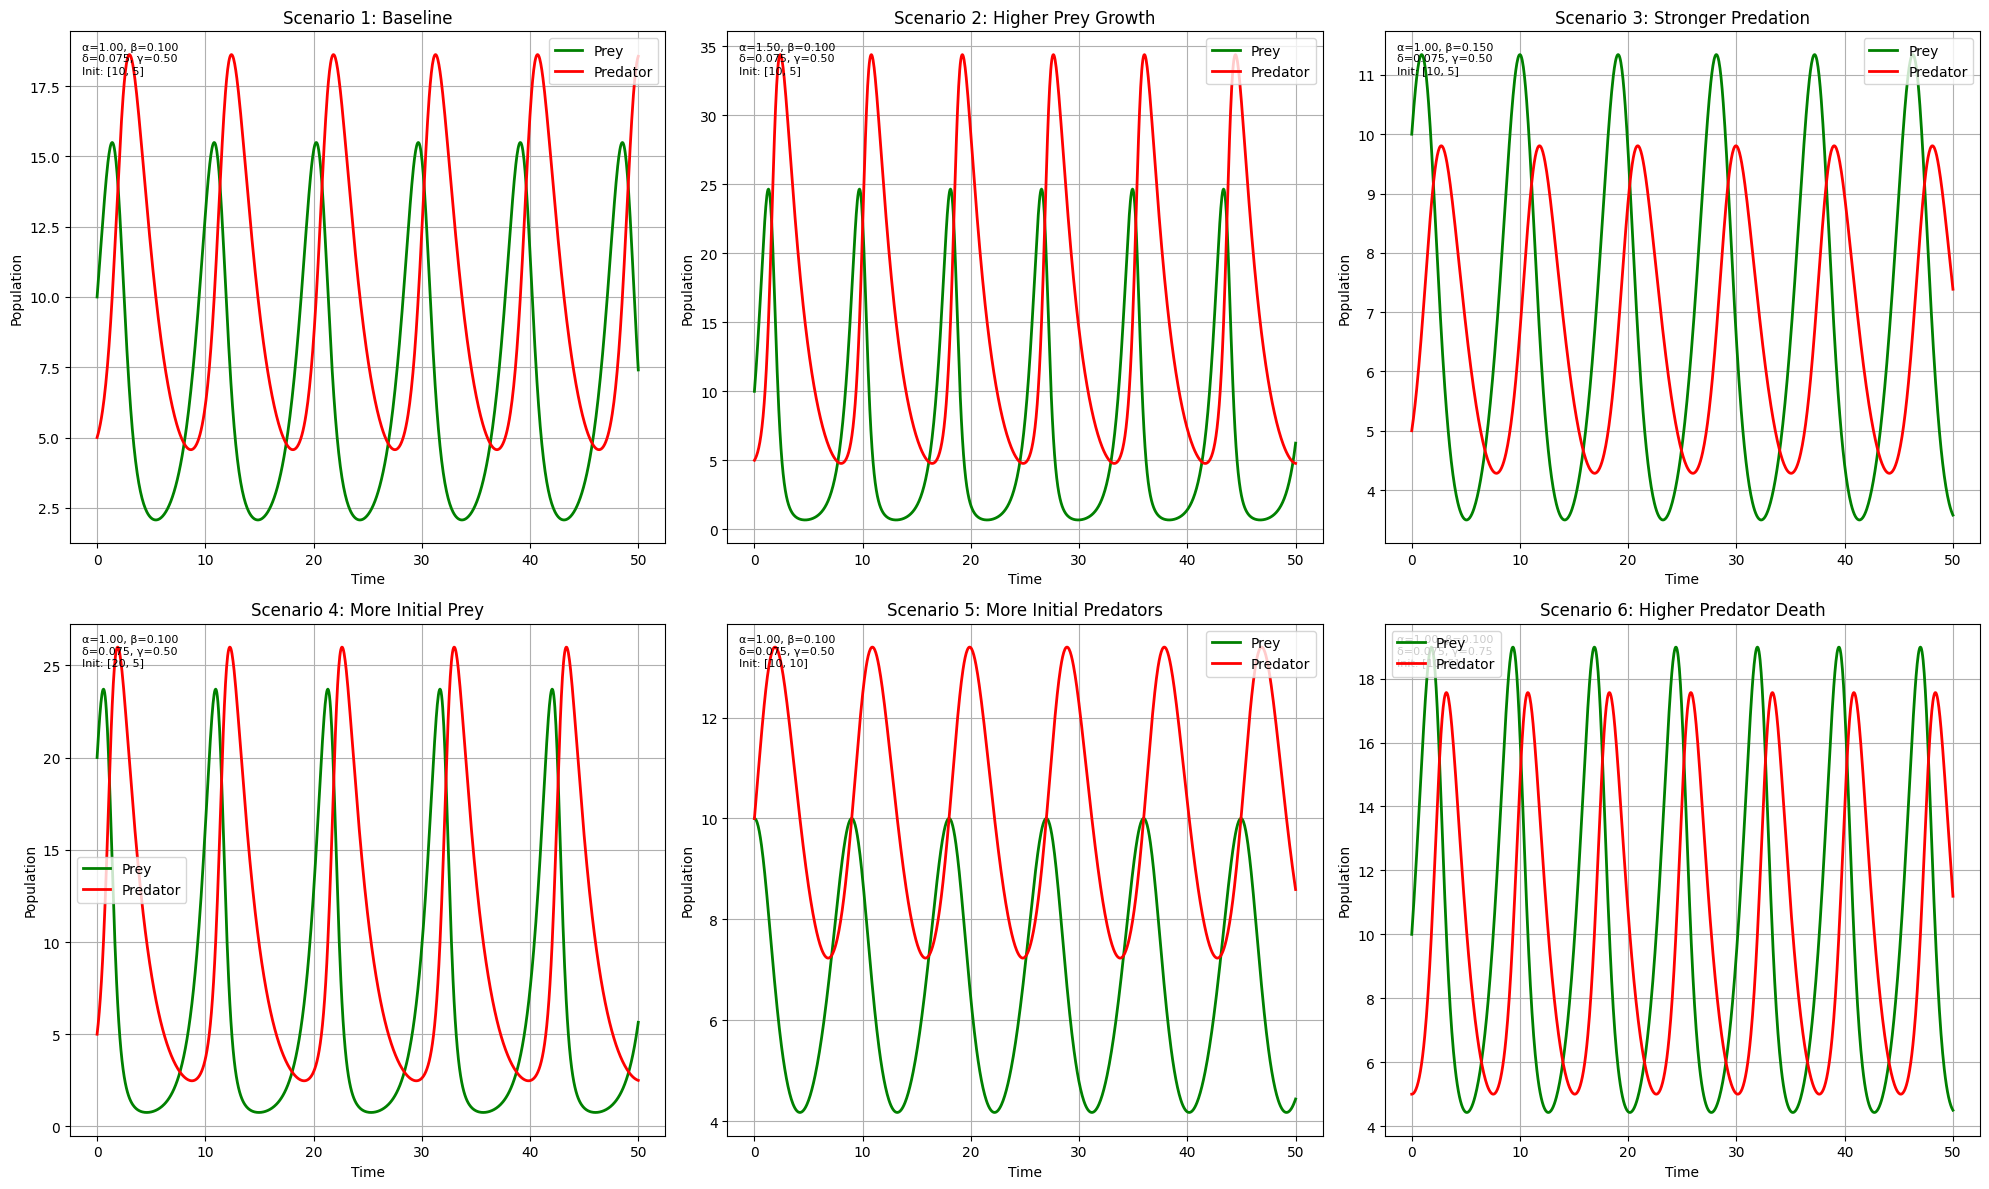

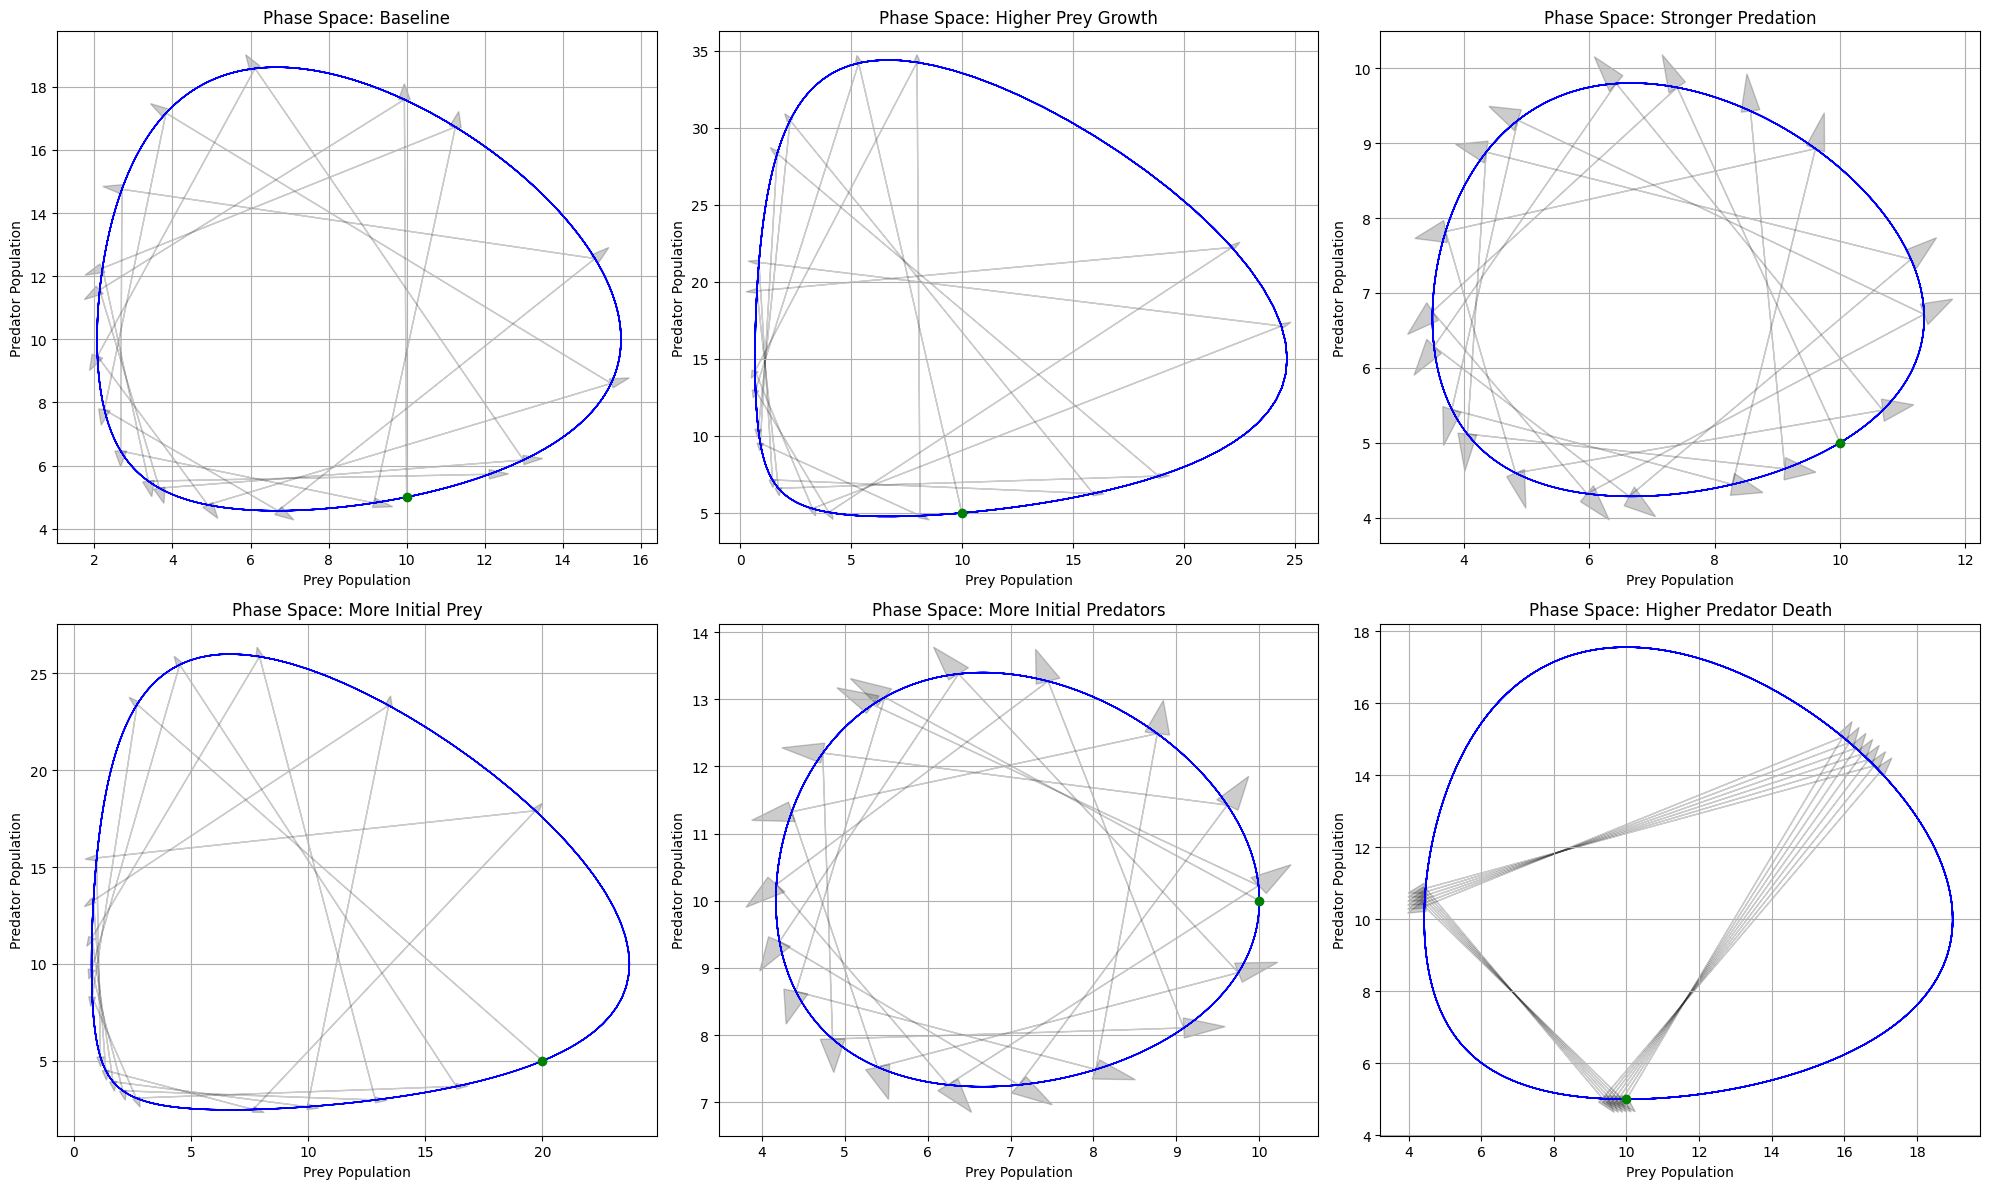

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def lotka_volterra(state, t, alpha, beta, delta, gamma):
    prey, predator = state
    return [
        alpha * prey - beta * prey * predator,
        delta * prey * predator - gamma * predator
    ]

# Time points
t = np.linspace(0, 50, 1000)

# Six different parameter sets
scenarios = [
    {
        'name': 'Baseline',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.075, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'Higher Prey Growth',
        'params': {'alpha': 1.5, 'beta': 0.1, 'delta': 0.075, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'Stronger Predation',
        'params': {'alpha': 1.0, 'beta': 0.15, 'delta': 0.075, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'More Initial Prey',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.075, 'gamma': 0.5},
        'init': [20, 5]
    },
    {
        'name': 'More Initial Predators',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.075, 'gamma': 0.5},
        'init': [10, 10]
    },
    {
        'name': 'Higher Predator Death',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.075, 'gamma': 0.75},
        'init': [10, 5]
    }
]

# Create subplots
fig = plt.figure(figsize=(20, 12))

for i, scenario in enumerate(scenarios, 1):
    # Time series plot
    ax1 = plt.subplot(2, 3, i)

    # Solve ODE
    solution = odeint(lotka_volterra, scenario['init'], t,
                     args=(scenario['params']['alpha'],
                           scenario['params']['beta'],
                           scenario['params']['delta'],
                           scenario['params']['gamma']))

    # Plot populations over time
    ax1.plot(t, solution[:, 0], 'g-', label='Prey', linewidth=2)
    ax1.plot(t, solution[:, 1], 'r-', label='Predator', linewidth=2)
    ax1.set_title(f"Scenario {i}: {scenario['name']}")
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population')
    ax1.legend()
    ax1.grid(True)

    # Add parameter text
    param_text = (f"α={scenario['params']['alpha']:.2f}, "
                 f"β={scenario['params']['beta']:.3f}\n"
                 f"δ={scenario['params']['delta']:.3f}, "
                 f"γ={scenario['params']['gamma']:.2f}\n"
                 f"Init: [{scenario['init'][0]}, {scenario['init'][1]}]")
    ax1.text(0.02, 0.98, param_text, transform=ax1.transAxes,
             verticalalignment='top', fontsize=8)

plt.tight_layout()
plt.show()

# Phase space plots
fig = plt.figure(figsize=(20, 12))

for i, scenario in enumerate(scenarios, 1):
    ax2 = plt.subplot(2, 3, i)

    # Solve ODE
    solution = odeint(lotka_volterra, scenario['init'], t,
                     args=(scenario['params']['alpha'],
                           scenario['params']['beta'],
                           scenario['params']['delta'],
                           scenario['params']['gamma']))

    # Plot phase space
    ax2.plot(solution[:, 0], solution[:, 1], 'b-', linewidth=1)
    ax2.plot(solution[0, 0], solution[0, 1], 'go', label='Start')
    ax2.set_title(f"Phase Space: {scenario['name']}")
    ax2.set_xlabel('Prey Population')
    ax2.set_ylabel('Predator Population')
    ax2.grid(True)

    # Add arrows to show direction
    step = len(t) // 20
    for j in range(0, len(t)-step, step):
        ax2.arrow(solution[j, 0], solution[j, 1],
                 solution[j+step, 0] - solution[j, 0],
                 solution[j+step, 1] - solution[j, 1],
                 head_width=0.3, head_length=0.5, fc='k', ec='k', alpha=0.2)

plt.tight_layout()
plt.show()

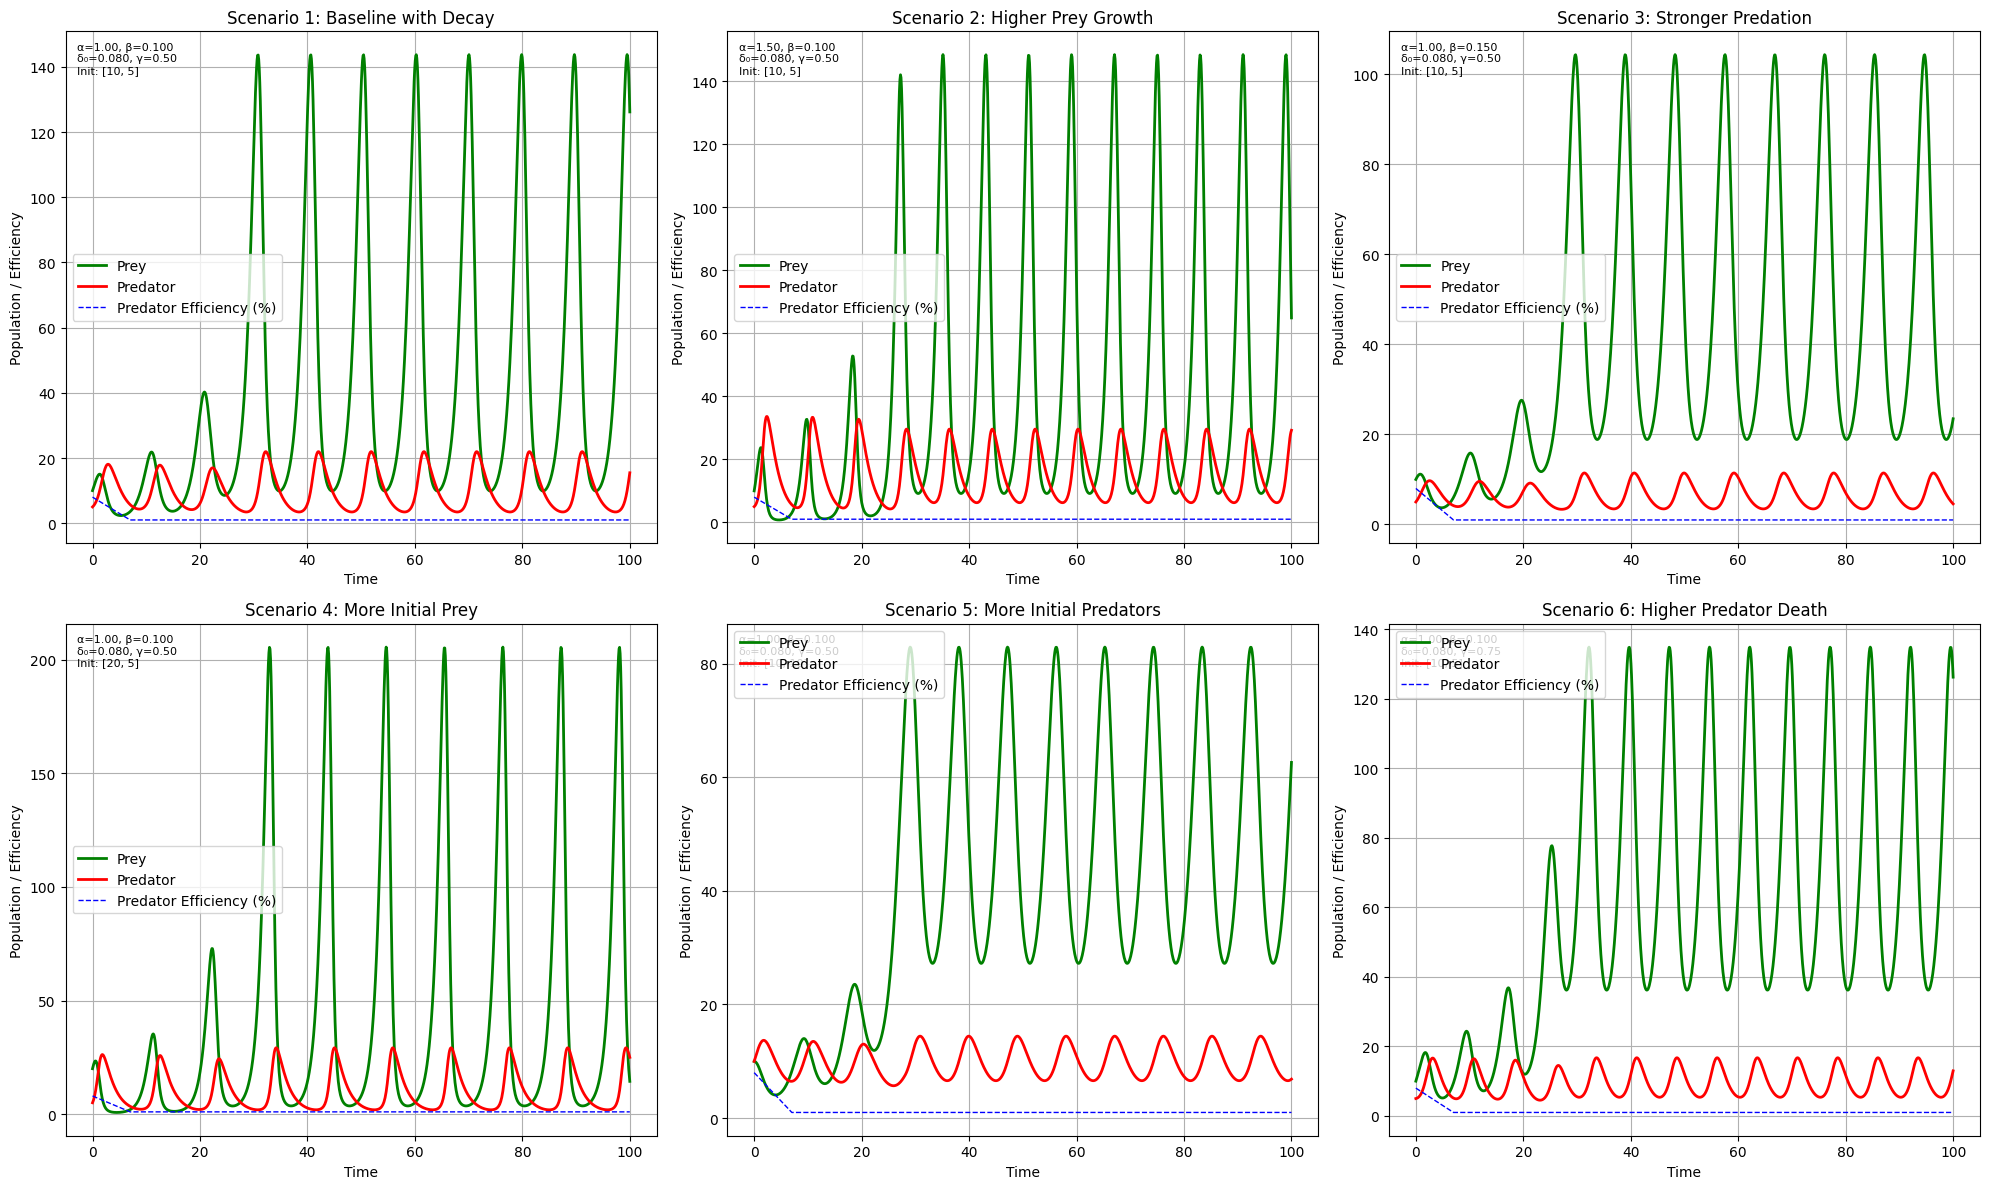

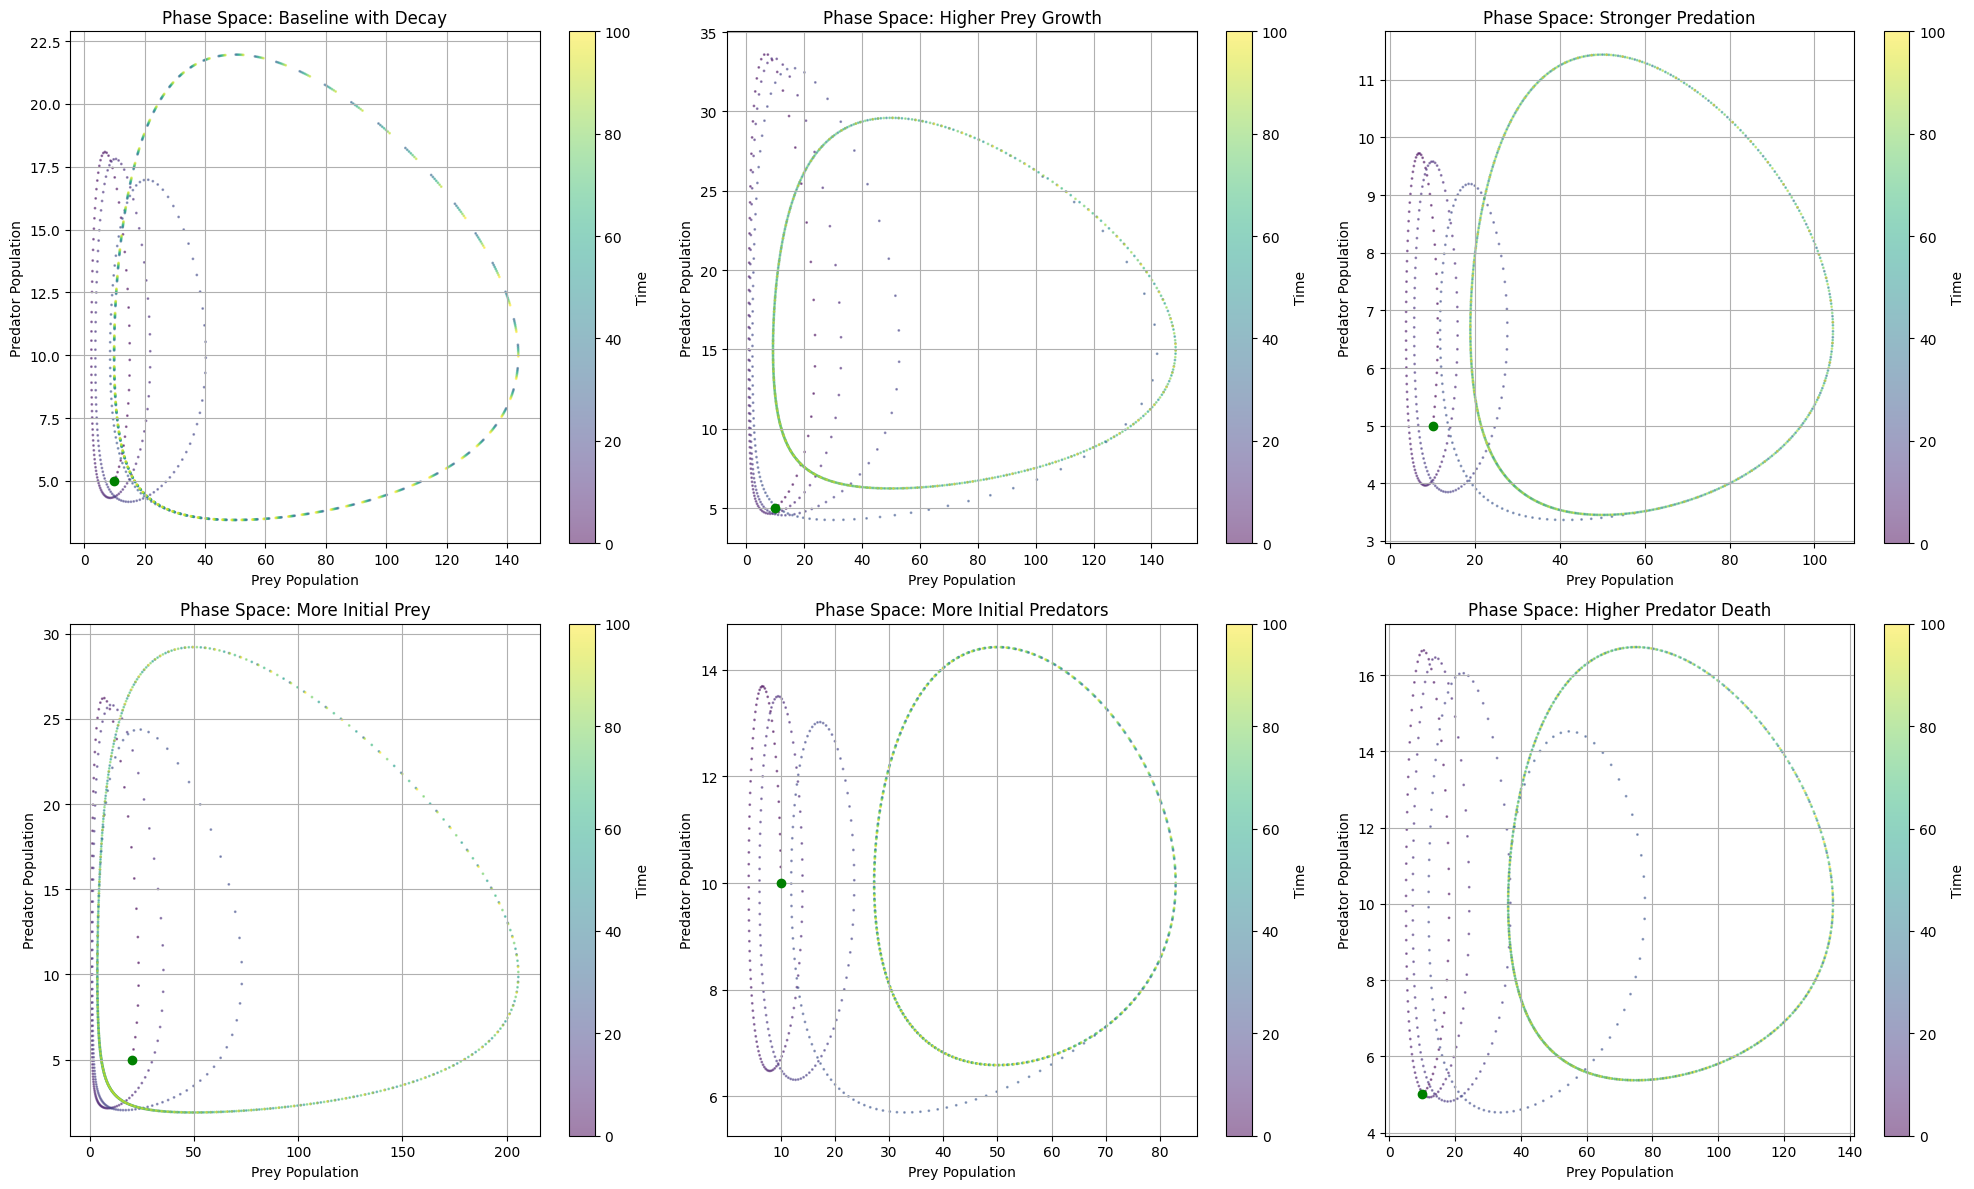

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def lotka_volterra_decay(state, t, alpha, beta, delta_init, gamma):
    prey, predator = state
    # Predator efficiency declines linearly with time
    delta = max(0.01, delta_init - 0.0025 * t)  # Set minimum efficiency to prevent negative
    return [
        alpha * prey - beta * prey * predator,
        delta * prey * predator - gamma * predator
    ]

# Time points
t = np.linspace(0, 100, 1000)

# Six different parameter sets with decaying predator efficiency
scenarios = [
    {
        'name': 'Baseline with Decay',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.08, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'Higher Prey Growth',
        'params': {'alpha': 1.5, 'beta': 0.1, 'delta': 0.08, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'Stronger Predation',
        'params': {'alpha': 1.0, 'beta': 0.15, 'delta': 0.08, 'gamma': 0.5},
        'init': [10, 5]
    },
    {
        'name': 'More Initial Prey',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.08, 'gamma': 0.5},
        'init': [20, 5]
    },
    {
        'name': 'More Initial Predators',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.08, 'gamma': 0.5},
        'init': [10, 10]
    },
    {
        'name': 'Higher Predator Death',
        'params': {'alpha': 1.0, 'beta': 0.1, 'delta': 0.08, 'gamma': 0.75},
        'init': [10, 5]
    }
]

# Create subplots
fig = plt.figure(figsize=(20, 12))

for i, scenario in enumerate(scenarios, 1):
    # Time series plot
    ax1 = plt.subplot(2, 3, i)

    # Solve ODE with decaying efficiency
    solution = odeint(lotka_volterra_decay, scenario['init'], t,
                     args=(scenario['params']['alpha'],
                           scenario['params']['beta'],
                           scenario['params']['delta'],
                           scenario['params']['gamma']))

    # Plot populations over time
    ax1.plot(t, solution[:, 0], 'g-', label='Prey', linewidth=2)
    ax1.plot(t, solution[:, 1], 'r-', label='Predator', linewidth=2)

    # Plot predator efficiency
    delta_t = [max(0.01, scenario['params']['delta'] - 0.01 * time) for time in t]
    ax1.plot(t, np.array(delta_t) * 100, 'b--', label='Predator Efficiency (%)', linewidth=1)

    ax1.set_title(f"Scenario {i}: {scenario['name']}")
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population / Efficiency')
    ax1.legend()
    ax1.grid(True)

    # Add parameter text
    param_text = (f"α={scenario['params']['alpha']:.2f}, "
                 f"β={scenario['params']['beta']:.3f}\n"
                 f"δ₀={scenario['params']['delta']:.3f}, "
                 f"γ={scenario['params']['gamma']:.2f}\n"
                 f"Init: [{scenario['init'][0]}, {scenario['init'][1]}]")
    ax1.text(0.02, 0.98, param_text, transform=ax1.transAxes,
             verticalalignment='top', fontsize=8)

plt.tight_layout()
plt.show()

# Phase space plots
fig = plt.figure(figsize=(20, 12))

for i, scenario in enumerate(scenarios, 1):
    ax2 = plt.subplot(2, 3, i)

    # Solve ODE
    solution = odeint(lotka_volterra_decay, scenario['init'], t,
                     args=(scenario['params']['alpha'],
                           scenario['params']['beta'],
                           scenario['params']['delta'],
                           scenario['params']['gamma']))

    # Plot phase space with color gradient to show time progression
    points = ax2.scatter(solution[:, 0], solution[:, 1],
                        c=t, cmap='viridis',
                        s=1, alpha=0.5)
    plt.colorbar(points, label='Time')

    ax2.plot(solution[0, 0], solution[0, 1], 'go', label='Start')
    ax2.set_title(f"Phase Space: {scenario['name']}")
    ax2.set_xlabel('Prey Population')
    ax2.set_ylabel('Predator Population')
    ax2.grid(True)

plt.tight_layout()
plt.show()